In [1]:
%reload_ext autoreload
%autoreload 2

In [22]:
from transformations.text.contraction.expand_contractions import ExpandContractions
from transformations.text.contraction.contract_contractions import ContractContractions
from transformations.text.emoji.emojify import Emojify, AddPositiveEmoji, AddNegativeEmoji, AddNeutralEmoji
from transformations.text.emoji.demojify import Demojify, RemovePositiveEmoji, RemoveNegativeEmoji, RemoveNeutralEmoji
from transformations.text.negation.remove_negation import RemoveNegation
from transformations.text.negation.add_negation import AddNegation
from transformations.text.contraction.expand_contractions import ExpandContractions
from transformations.text.contraction.contract_contractions import ContractContractions
from transformations.text.word_swap.change_number import ChangeNumber
from transformations.text.word_swap.change_synse import ChangeSynonym, ChangeAntonym, ChangeHyponym, ChangeHypernym
from transformations.text.word_swap.word_deletion import WordDeletion
from transformations.text.word_swap.homoglyph_swap import HomoglyphSwap
from transformations.text.word_swap.random_swap import RandomSwap
from transformations.text.insertion.random_insertion import RandomInsertion
from transformations.text.insertion.sentiment_phrase import InsertSentimentPhrase, InsertPositivePhrase, InsertNegativePhrase
from transformations.text.links.add_sentiment_link import AddSentimentLink, AddPositiveLink, AddNegativeLink
from transformations.text.links.import_link_text import ImportLinkText
from transformations.text.entities.change_location import ChangeLocation
from transformations.text.entities.change_name import ChangeName
from transformations.text.typos.char_delete import RandomCharDel
from transformations.text.typos.char_insert import RandomCharInsert
from transformations.text.typos.char_substitute import RandomCharSubst
from transformations.text.typos.char_swap import RandomCharSwap
from transformations.text.typos.char_swap_qwerty import RandomSwapQwerty 

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datasets import load_dataset
from collections import defaultdict
import pandas as pd
import random
import time

### Data

In [4]:
dataset = load_dataset("imdb")

Dataset imdb downloaded and prepared to /Users/asakhala/.cache/huggingface/datasets/imdb/plain_text/1.0.0/90099cb476936b753383ba2ae6ab2eae419b2e87f71cd5189cb9c8e5814d12a3. Subsequent calls will reuse this data.


In [11]:
dataset.shuffle()

DatasetDict({'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['neg', 'pos'], names_file=None, id=None)}, num_rows: 25000), 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['neg', 'pos'], names_file=None, id=None)}, num_rows: 25000), 'unsupervised': Dataset(features: {'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['neg', 'pos'], names_file=None, id=None)}, num_rows: 50000)})

In [12]:
dataset.shape

{'train': (25000, 2), 'test': (25000, 2), 'unsupervised': (50000, 2)}

In [13]:
dataset.data

{'train': pyarrow.Table
 label: int64
 text: string,
 'test': pyarrow.Table
 label: int64
 text: string,
 'unsupervised': pyarrow.Table
 label: int64
 text: string}

In [18]:
dataset["test"][75]

{'label': 1,
 'text': '"What\'s his name?" "Loudon." "Loudon what?" "Clear."<br /><br />That gag still gets me, TWENTY ONE years after the film was released.<br /><br />I loved the film back then and I love it today. I must have watched this a hundred times back in the day, and when I bought the DVD recently I could still remember some of the dialogue.<br /><br />Madonna plays Nikki Finn, a young woman jailed for a crime she didn\'t commit. When she gets out she decides to seek revenge.<br /><br />Griffin Dunne (whatever happened to him?), plays an attorney for his fiancée\'s father (John McMartin). The future father-in-law asks Loudon to take Nikki from prison to the bus station and to make sure she gets on the bus, as part of a supposed new public relations programme. A seemingly easy task, but there are complications aplenty, some funny dialogue, and some admittedly stupid-but-funny scenes along the way.<br /><br />Madonna has a stupid voice in this film, which until I was able to w

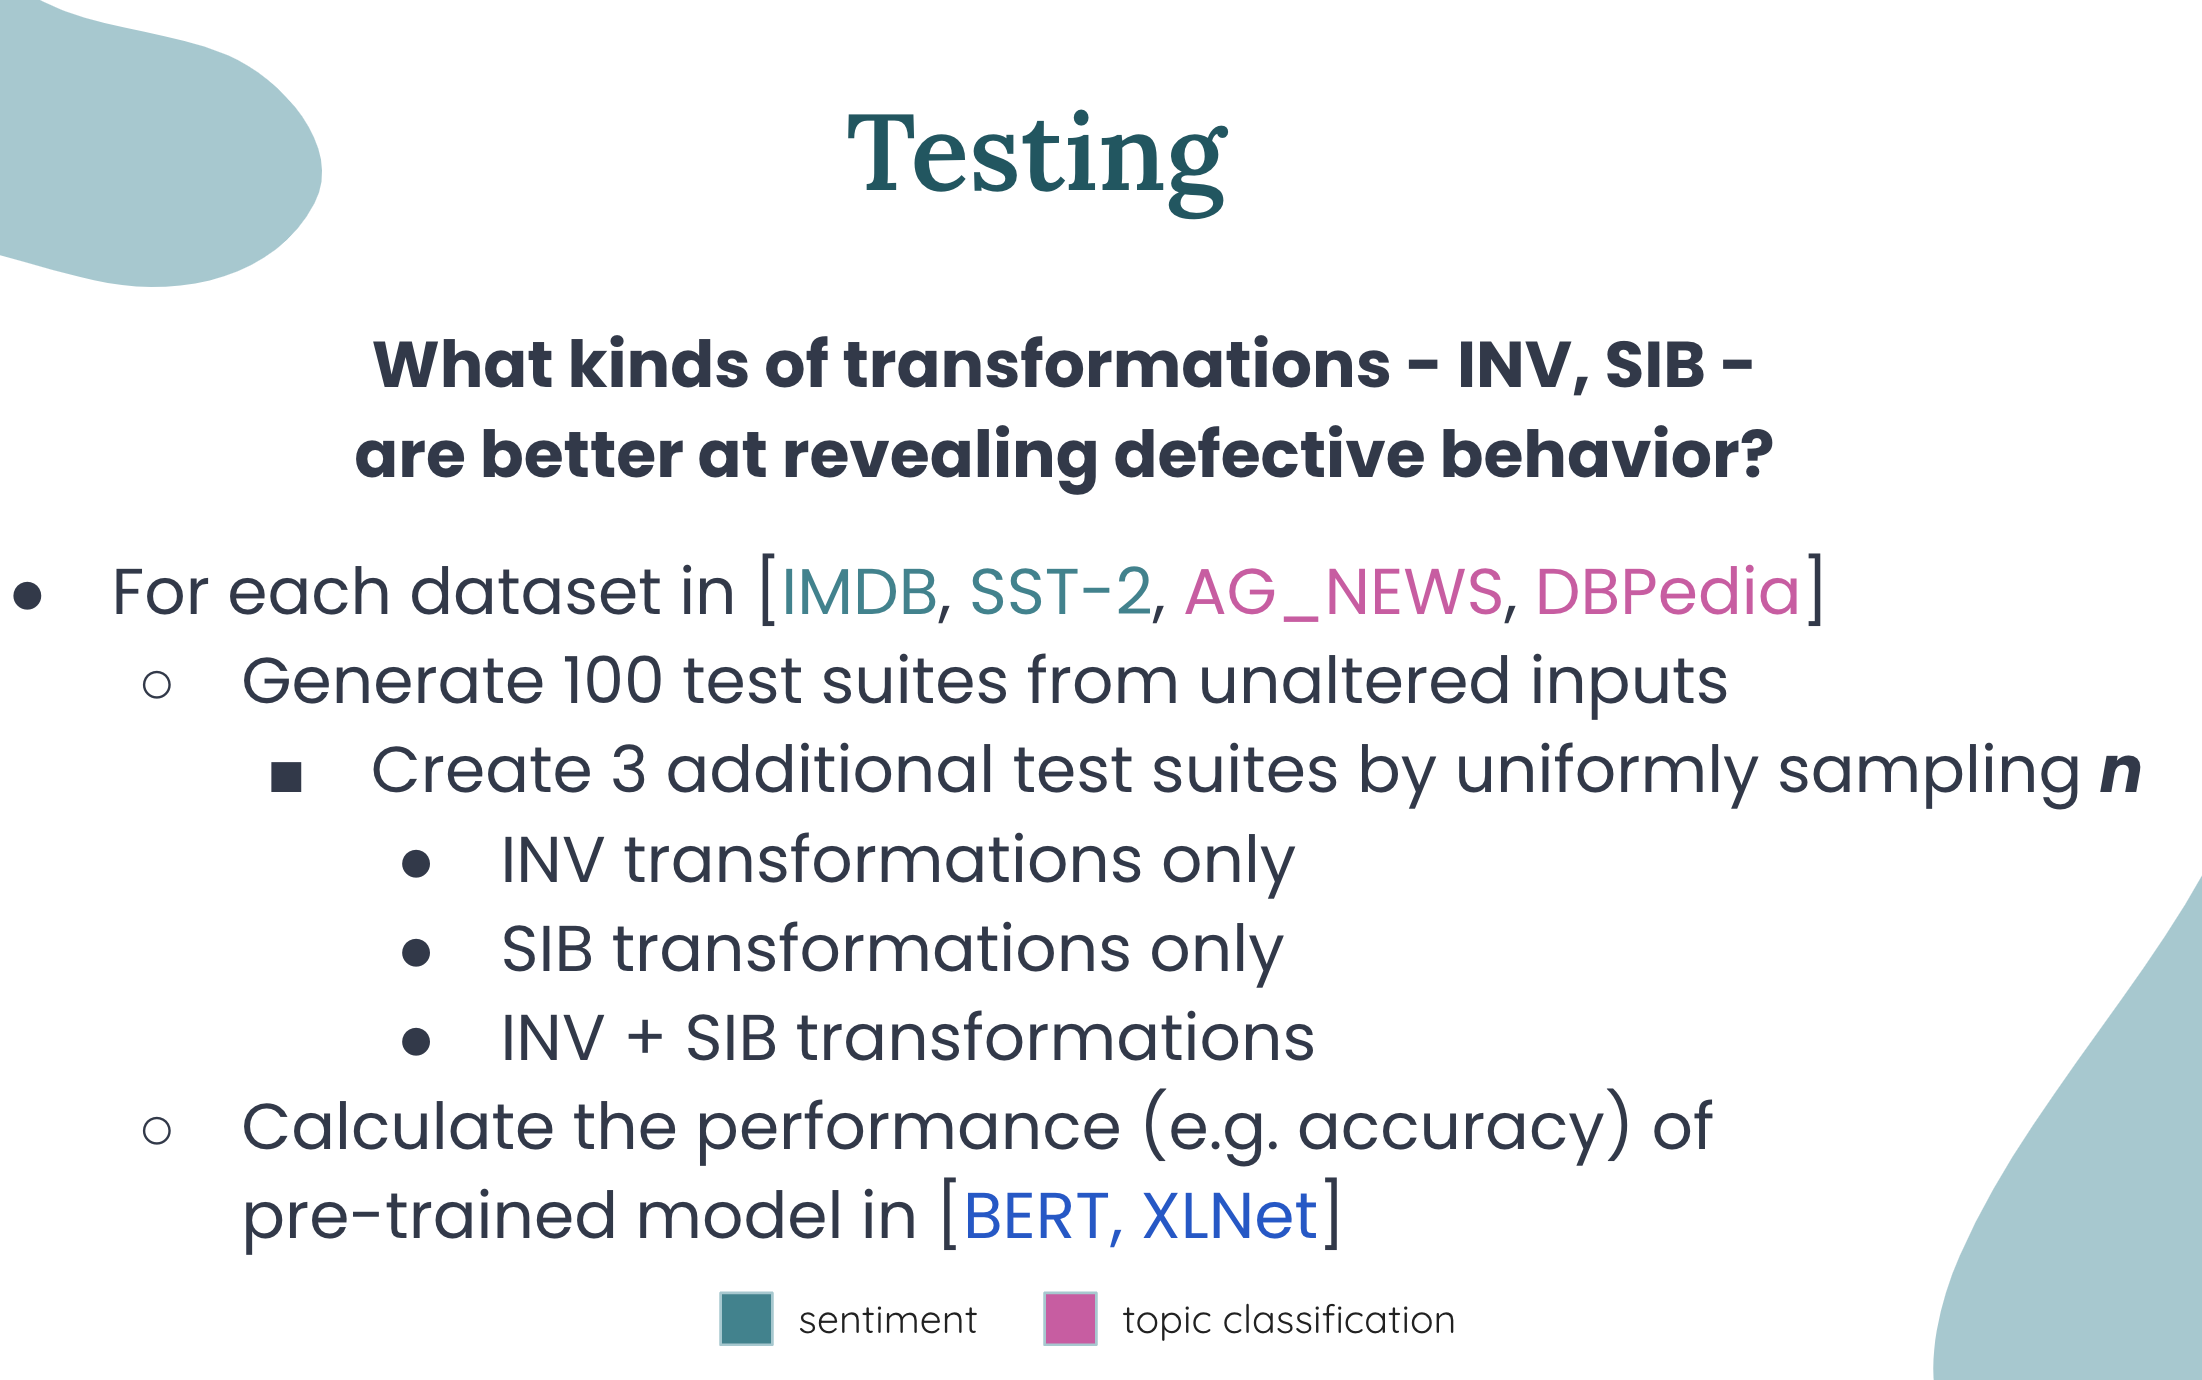

### Sentiment Model
just to get some quick feedback on whether the transformations seem to be affecting the prediction

In [5]:
def get_sentiment(string):
    return analyser.polarity_scores(string)['compound']

analyser = SentimentIntensityAnalyzer()

### Transformation

In [6]:
transformations = [
    ExpandContractions,
    ContractContractions,
    Emojify,
    AddPositiveEmoji,
    AddNegativeEmoji,
    AddNeutralEmoji,
    Demojify, 
    RemovePositiveEmoji,
    RemoveNegativeEmoji,
    RemoveNeutralEmoji,
    ChangeLocation,
    ChangeName,
    InsertPositivePhrase,
    InsertNegativePhrase,
    RandomInsertion,
    AddPositiveLink,
    AddNegativeLink,
    ImportLinkText,
    AddNegation,
    RemoveNegation,
    RandomCharDel,
    RandomCharInsert, 
    RandomCharSubst, 
    RandomCharSwap, 
    RandomSwapQwerty,
    ChangeNumber,
    ChangeSynonym, 
    ChangeAntonym, 
    ChangeHyponym, 
    ChangeHypernym,
    WordDeletion, 
    HomoglyphSwap, 
    RandomSwap
]

In [19]:
df_all = []
for transform in transformations:
    t = transform()
    df = t.get_tran_types()
    df['transformation'] = t.__class__.__name__
    df['tran_fn'] = t
    df_all.append(df)
    
df = pd.concat(df_all)

In [20]:
df

,task_name,tran_type,transformation,tran_fn
0,sentiment,INV,ExpandContractions,<transformations.text.contraction.expand_contr...
1,topic,INV,ExpandContractions,<transformations.text.contraction.expand_contr...
0,sentiment,INV,ContractContractions,<transformations.text.contraction.contract_con...
1,topic,INV,ContractContractions,<transformations.text.contraction.contract_con...
0,sentiment,INV,Emojify,<transformations.text.emoji.emojify.Emojify ob...
...,...,...,...,...
1,topic,INV,WordDeletion,<transformations.text.word_swap.word_deletion....
0,sentiment,INV,HomoglyphSwap,<transformations.text.word_swap.homoglyph_swap...
1,topic,INV,HomoglyphSwap,<transformations.text.word_swap.homoglyph_swap...
0,sentiment,INV,RandomSwap,<transformations.text.word_swap.random_swap.Ra...


In [28]:
transform = RemoveNegation(task='sentiment',meta=True)
string_in = "I didn't do nothing."
string_out = transform.transform_Xy(string_in, 1)
# string_out = transform(string_in)
print(string_out)

('I did do nothing.', 0, {'change': True})


### INV Transforms

In [15]:
task = df['task_name'] == 'sentiment'
tran = df['tran_type'] == 'INV'

df_all = df[task & tran]
df_all

,task_name,tran_type,transformation,tran_fn
0,sentiment,INV,ExpandContractions,<transformations.text.contraction.expand_contr...
0,sentiment,INV,ContractContractions,<transformations.text.contraction.contract_con...
0,sentiment,INV,Emojify,<transformations.text.emoji.emojify.Emojify ob...
0,sentiment,INV,AddNeutralEmoji,<transformations.text.emoji.emojify.AddNeutral...
0,sentiment,INV,Demojify,<transformations.text.emoji.demojify.Demojify ...
0,sentiment,INV,RemoveNeutralEmoji,<transformations.text.emoji.demojify.RemoveNeu...
0,sentiment,INV,ChangeLocation,<transformations.text.entities.change_location...
0,sentiment,INV,ChangeName,<transformations.text.entities.change_name.Cha...
0,sentiment,INV,RandomInsertion,<transformations.text.insertion.random_inserti...
0,sentiment,INV,ImportLinkText,<transformations.text.links.import_link_text.I...


In [12]:
n = 20
i = random.randint(0, len(dataset['train']['text']) - 1 - n)
X, y = dataset['train']['text'][i:i+n], dataset['train']['label'][i:i+n]

In [13]:
Xs, ys, ts = X, y, defaultdict(list)
num_X = 1000

tic = time.perf_counter()
while len(Xs) < num_X:
    
    # sample an (X,y) pair
    i = random.randint(0, len(Xs) - 1)
    X_, y_, ts_ = Xs[i], ys[i], ts[i]
    
    # sample a transformation
    t_df   = df_all.sample(1)
    t_fn   = t_df['tran_fn'][0]
    t_name = t_df['transformation'][0]
                
    if t_name in ts_:
        continue
    
    applied_ts = ts_ + [t_name]

    new_X_, new_y_ = t_fn.transform_Xy(X_, y_)

    if new_X_ not in Xs:
        Xs.append(new_X_)
        ys.append(new_y_)
        j = len(Xs) - 1
        ts[j].extend(applied_ts)
    
toc = time.perf_counter()
print('Time to generate {0} examples: {1:.2f} seconds'.format(num_X, (toc - tic)))

Time to generate 1000 examples: 35.48 seconds


In [17]:
len(Xs), len(ys)

(1000, 1000)

In [14]:
ts

defaultdict(list,
            {3: [],
             20: ['ContractContractions'],
             7: [],
             21: ['RandomCharDel'],
             13: [],
             17: [],
             22: ['HomoglyphSwap'],
             2: [],
             23: ['RandomSwap'],
             6: [],
             24: ['ChangeHyponym'],
             0: [],
             25: ['AddNeutralEmoji'],
             18: [],
             26: ['ContractContractions'],
             1: [],
             27: ['ChangeHypernym'],
             28: ['ContractContractions', 'WordDeletion'],
             10: [],
             29: ['RandomSwapQwerty'],
             30: ['ChangeHypernym', 'RandomCharSubst'],
             14: [],
             31: ['RandomCharInsert'],
             32: ['RandomCharSubst'],
             8: [],
             33: ['RandomSwap'],
             34: ['AddNeutralEmoji', 'RandomCharSubst'],
             35: ['Emojify'],
             36: ['RandomSwap', 'HomoglyphSwap'],
             37: ['RandomSwap', 'C

### SIB Transforms

In [19]:
task = df['task_name'] == 'sentiment'
tran = df['tran_type'] == 'SIB'

df_all = df[task & tran]
df_all

,task_name,tran_type,transformation,tran_fn
0,sentiment,SIB,AddPositiveEmoji,<transformations.text.emoji.emojify.AddPositiv...
0,sentiment,SIB,AddNegativeEmoji,<transformations.text.emoji.emojify.AddNegativ...
0,sentiment,SIB,RemovePositiveEmoji,<transformations.text.emoji.demojify.RemovePos...
0,sentiment,SIB,RemoveNegativeEmoji,<transformations.text.emoji.demojify.RemoveNeg...
0,sentiment,SIB,InsertPositivePhrase,<transformations.text.insertion.sentiment_phra...
0,sentiment,SIB,InsertNegativePhrase,<transformations.text.insertion.sentiment_phra...
0,sentiment,SIB,AddPositiveLink,<transformations.text.links.add_sentiment_link...
0,sentiment,SIB,AddNegativeLink,<transformations.text.links.add_sentiment_link...
0,sentiment,SIB,AddNegation,<transformations.text.negation.add_negation.Ad...
0,sentiment,SIB,RemoveNegation,<transformations.text.negation.remove_negation...


In [20]:
n = 20
i = random.randint(0, len(dataset['train']['text']) - 1 - n)
X, y = dataset['train']['text'][i:i+n], dataset['train']['label'][i:i+n]

In [21]:
Xs, ys, ts = X, y, defaultdict(list)
num_X = 1000

tic = time.perf_counter()
while len(Xs) < num_X:
    
    # sample an (X,y) pair
    i = random.randint(0, len(Xs) - 1)
    X_, y_, ts_ = Xs[i], ys[i], ts[i]

    # sample a transformation
    t_df   = df_all.sample(1)
    t_fn   = t_df['tran_fn'][0]
    t_name = t_df['transformation'][0]
    
    if t_name in ts_:
        continue
    
    applied_ts = ts_ + [t_name]

    new_X_, new_y_ = t_fn.transform_Xy(X_, y_)

    if new_X_ not in Xs:
        Xs.append(new_X_)
        ys.append(new_y_)
        j = len(Xs) - 1
        ts[j].extend(applied_ts)
    
toc = time.perf_counter()
print('Time to generate {0} examples: {1:.2f} seconds'.format(num_X, (toc - tic)))

Time to generate 1000 examples: 13.34 seconds


In [22]:
len(Xs), len(ys)

(1000, 1000)

In [23]:
ts

defaultdict(list,
            {14: [],
             20: ['InsertPositivePhrase'],
             18: [],
             21: ['AddNegation'],
             11: [],
             22: ['AddPositiveEmoji'],
             2: [],
             23: ['ChangeAntonym'],
             9: [],
             19: [],
             24: ['InsertPositivePhrase'],
             25: ['InsertPositivePhrase', 'AddNegativeEmoji'],
             5: [],
             12: [],
             26: ['ChangeAntonym'],
             27: ['AddNegativeEmoji'],
             4: [],
             28: ['ChangeAntonym'],
             29: ['AddPositiveEmoji', 'RemoveNegation'],
             13: [],
             30: ['AddPositiveLink'],
             31: ['AddNegativeEmoji', 'AddPositiveEmoji'],
             32: ['AddNegativeEmoji', 'ChangeAntonym'],
             33: ['ChangeAntonym', 'AddNegativeEmoji'],
             6: [],
             34: ['ChangeAntonym'],
             8: [],
             35: ['RemoveNegation'],
             36: ['InsertPos